In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.5)

In [30]:
!ls -l *.csv

-rwxr-xr-x 1 quang quang 15144 Dec  9 17:09 fandango_score_comparison.csv


In [31]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


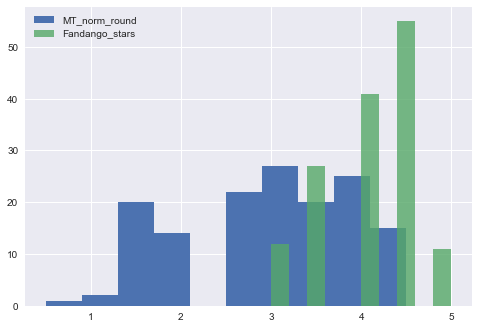

In [34]:
fig, ax = plt.subplots()
movies['Metacritic_norm_round'].hist(label='MT_norm_round')
movies['Fandango_Stars'].hist(alpha=0.8, label='Fandango_stars')
plt.legend()
plt.show()

In [35]:
mean_MT = movies['Metacritic_norm_round'].mean()
mean_FD = movies['Fandango_Stars'].mean()
median_MT = movies['Metacritic_norm_round'].median()
median_FD = movies['Fandango_Stars'].median()
std_MT = movies['Metacritic_norm_round'].std()
std_FD = movies['Fandango_Stars'].std()
print('Mean of MT, and FD are {}, and {}'.format(mean_MT, mean_FD))
print('Median of MT, and FD are {}, and {}'.format(median_MT, median_FD))
print('Standard deviation of MT, and FD are {}, and {}'.format(std_MT, std_FD))

Mean of MT, and FD are 2.9726027397260273, and 4.089041095890411
Median of MT, and FD are 3.0, and 4.0
Standard deviation of MT, and FD are 0.9909605613743364, and 0.5403859779787333


Make a scatterplot that compares the Fandango_Stars column to the Metacritic_norm_round column.

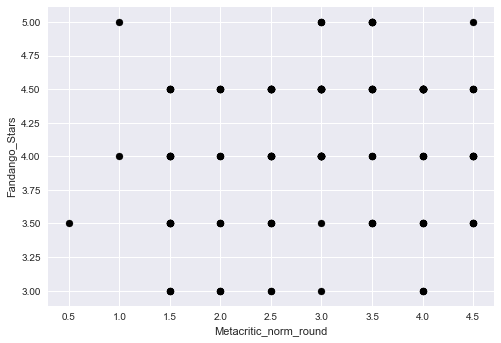

In [48]:
fig, ax = plt.subplots()
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'], c='black')
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango_Stars')
plt.show()

In [53]:
movies['fm_diff'] = np.abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort_values(by='fm_diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [55]:
cor_MT_FD = pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
cor_MT_FD

(0.17844919073895918, 0.031161516228523815)

In [63]:
reg = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

In [64]:
reg

LinregressResult(slope=0.097311077973928267, intercept=3.7997739188994188, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.04471354465679829)

Predict what a movie that got a 3.0 in Metacritic would get on Fandango

In [65]:
3.0 * reg.slope + reg.intercept

4.0917071528212041

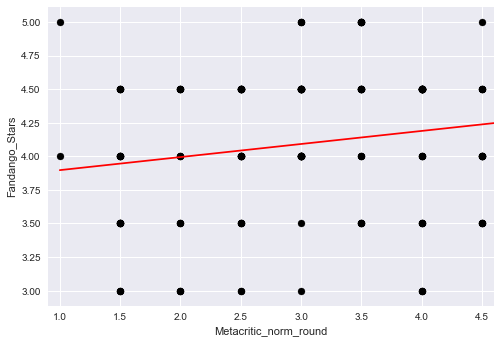

In [74]:
x = np.array([1.0, 5.0])
y = x * reg.slope + reg.intercept
fig, ax = plt.subplots()
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'], c='k')
plt.plot(x, y, c='r')
plt.xlim(0.9, 4.6)
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango_Stars')
plt.show()